In [1]:
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2

### Problem 1

Let's first observe how scikit-learn's KMeans classifier works on some randomly generated data. We'll make use of the `make_blobs()` method in `sklearn.datasets`, which randomly generates points that naturally fit into groups (called 'blobs'). This gives us a good dataset to demonstrate the results of KMeans clustering.

> We start by importing all the libraries and methods we need.

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

> Now we can use `make_blobs()` to, well, make some blobs. We can specify how many points to generate with `n_samples` and how many blobs to make with `centers`. `random_state` is a seed for the random number generator. Here, we specify that 5 blobs should be made.

In [3]:
# random_state can be any integer value. It is used as a seed for
# the random generator so that we get the same random results every
# time. Without this specified, each run of this code would produce
# a new random set of values. Feel free to change this value to see
# what different results show up.
random_state = 42
# n_samples specifies how many points to generate.
# centers specifies how many blobs to make.
X, y = make_blobs(n_samples=2000, centers=5, random_state=random_state)

> Let's see what this looks like by plotting the points.

Text(0.5,1,'Random blobs')

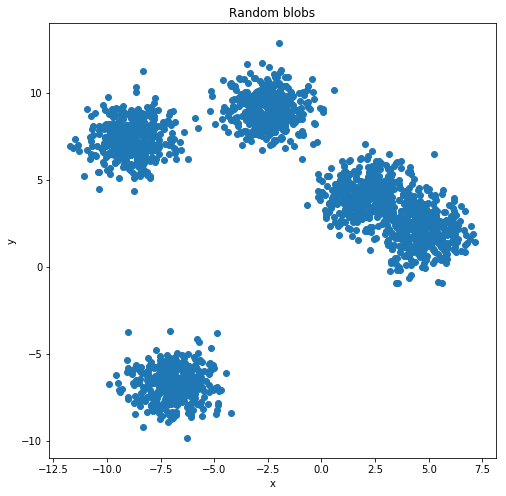

In [4]:
# Make the plot a relatively small size
plt.figure(figsize=(8, 8))

# Plot the blobs
# The first and second column of X are the x- and y- values respectively.
plt.scatter(X[:, 0], X[:, 1])

# Add labels and a title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random blobs')

> There are clearly 5 clusters here. Just to make things interesting, let's first classify this data with a `k` value of 3.

In [5]:
# Create our KMeans classifier
# n_clusters specifies what value of k to use (how many clusters)
kmeans_clf = KMeans(n_clusters=3, random_state=random_state)

# fit_predict does two things: fits the classifier using X
# and then predicts the clusters, assigning an index to each cluster.
# You can also call fit() and predict() separately.
y_pred = kmeans_clf.fit_predict(X)

> Plot the data points, but with different colors for each of the clusters we determined using KMeans.

Text(0.5,1,'KMeans Example - Random Data')

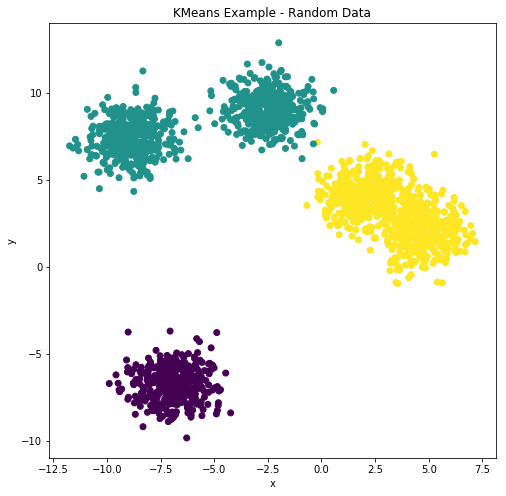

In [6]:
# Make the plot a relatively small size
plt.figure(figsize=(8, 8))

# Plot the results
# c specifies the colors of each point if given an array (as we do here).
# A new color will be used for each value in the given array, so each
# point in X is given a color corresponding to the predicted value in y_pred.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Add labels and a title
plt.xlabel('x')
plt.ylabel('y')
plt.title('KMeans Example - Random Data')

> The results are pretty good given that we gave our KMeans classifier an incorrect value for `k`. Try changing the value of `n_clusters` for our KMeans classifier above to 5 and see what the results are. Do the clusters match what you would expect? How about 10 clusters?

### Problem 2

Let's see how KMeans can be used on real data now by using our twitter dataset. 

First, we'll import the required libaries. 

In [7]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score

import nltk 
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /Users/js/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
url = 'https://raw.githubusercontent.com/eliaszwang/AI4ALL2020/master/data/pd_labeled-data-singlelabels-train.csv'
df_data = pd.read_csv(url)

tweets_text  = df_data['Text']
tweets_class = df_data['Class']
tweets_type  = df_data['Type']

Next, we'll load our data using pandas.

Our next step is to convert our twitter data from a list of strings to a matrix with numbers. We'll go over why and how to represent text from our tweets with numerical data in vectorized form later in the course, but for now, just assume that we use some mapping (in this case this mapping is implemented by the TfidfVectorizer class) to transform the text in our tweets to a matrix. 

In [9]:
url = 'https://raw.githubusercontent.com/eliaszwang/AI4ALL2020/master/data/pd_labeled-data-singlelabels-train.csv'
df_data = pd.read_csv(url)

tweets_text  = df_data['Text']
tweets_class = df_data['Class']

In [10]:
# Convert the list of text from the tweets into a vectorized form
vectorizer = TfidfVectorizer()
vec_train_tweets = vectorizer.fit_transform(tweets_text)

## Select the number of clusters

Next, we need to figure out how many clusters we need for our data. In problem 1, it was easy to see that we had 5 clusters in the data, but in this case, we don't know how many clusters are in the data. 

To tune this parameter, we will test the performance of our model with different number of clusters and select the best one. 

We're going to use two metrics to evaluate the performance of the model. 
* **Homogeneity score**: This metric describes what percentage of each cluster belongs to the same class. This metric assumes you have access to the true labels. 
* **Silhouette score**: This metric returns a measure of how similar a data point is to the cluster it is a part of compared to the other clusters. If our model is performing well, then data points in a single cluster should be very similar, so we want a high silhouette score. 
* **Inertia**: This metric calculates the distance between data points within a given cluster. Because we want our data points in a given cluster to be close to each other, we want the inertia to be small. 

We've created a list of cluster sizes called kNumClusters, and we are going to iterate through each size in the list and test how well the model performs with this cluster size. 

**Fun tip**: 
The for loop below that iterates through each element of the kNumClusters wraps kNumClusters with tqdm.tqdm. This is a library that will display a progress bar when you execute the code block displaying how many iterations you've finished in the for loop. Given that the kmeans clustering algorithm can take a while for larger number of clusters, it's nice to know how much progress we've made. 

Your task: Using the sample code in problem 1, create a kmeans model and fit it to the training data (vec_train_tweets) 

In [ ]:
# Try the metrics yourself: 

# Homogeneity score
print("%.6f" % homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0]))
print("%.6f" % homogeneity_score([1, 1, 0, 0], [1, 1, 0, 0]))
print("%.6f" % homogeneity_score([1, 0, 1, 0], [1, 1, 0, 0]))

silhouette_score

In [12]:
silhouette_scores = []
homogeneity_scores = []
inertias = []

kNumClusters = [3, 5, 50, 200, 500, 1000]  # list of cluster sizes to try

for k in tqdm.tqdm(kNumClusters):
    ### YOUR CODE HERE ####
    # Add a line to create the model. Pay attention to what the n_clusters 
    # parameter should be 
    model = KMeans(n_clusters=k, random_state=random_state)

    # Add a line to run the kmeans algorithm on our data, vec_train_tweets
    y_pred = model.fit_predict(vec_train_tweets)
    
    ### END CODE HERE ####
    silhouette_scores.append(silhouette_score(vec_train_tweets, model.labels_))
    inertias.append(model.inertia_)
    homogeneity_scores.append(homogeneity_score(tweets_class, model.predict(vec_train_tweets)))

100%|██████████| 6/6 [00:53<00:00,  8.89s/it]


Next, we'll plot our silhouette score and inertia metric to see which number of clusters is best for our data. 

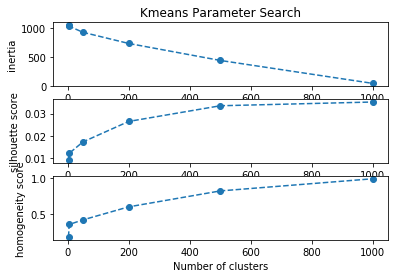

In [13]:
# plot the quality metrics for inspection
fig, ax = plt.subplots(3, 1, sharex=True)

plt.subplot(311)
plt.plot(kNumClusters, inertias, 'o--')
plt.ylabel('inertia')
plt.title('Kmeans Parameter Search')

plt.subplot(312)
plt.plot(kNumClusters, silhouette_scores, 'o--')
plt.ylabel('silhouette score')
plt.xlabel('Number of clusters');

plt.subplot(313)
plt.plot(kNumClusters, homogeneity_scores, 'o--')
plt.ylabel('homogeneity score')
plt.xlabel('Number of clusters');

In [14]:
print("total number of tweets", len(tweets_text))

total number of tweets 1120


Our model doesn't seem to perform very well. Let's take a look at our data with a technique called Principle Component Analysis (PCA) and see what's going on. PCA allows us to reduce the features of the vectorized embeddings of our tweet into 2D to allow us to visualize it. The plot assigns a color to each tweet according to the true class it belongs to. 

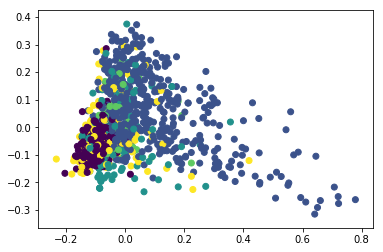

In [15]:
# reduce the features to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(vec_train_tweets.toarray())

class_dict = {"None":0, "Food":1, "Water":2, "Medical": 3, "Energy": 4}
class_list = [class_dict[x] for x in tweets_class]

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=class_list)
plt.show()

Can you identify clear clusters in our data given this embedding? 

**Pick a number for the number of clusters** 


In [17]:
### YOUR CODE HERE ####
kBestNumClusters = 5
### END CODE HERE ####

Next, we'll train a Kmeans model on our data using the number of clusters you've selected.

In [18]:
### YOUR CODE HERE ####
km_model = KMeans(n_clusters=kBestNumClusters, n_jobs=-1)
km_model.fit(vec_train_tweets)
### END CODE HERE ####

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Investigate the clusters in our data

First, we'll look at the how many data points are in each cluster. 

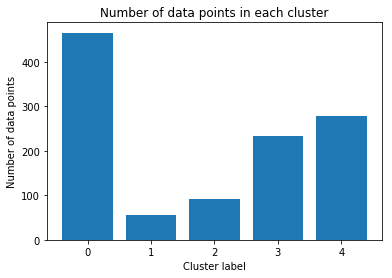

In [19]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.ylabel('Number of data points')
plt.xlabel('Cluster label')
plt.title('Number of data points in each cluster');

Next, let's see what the distribution of tweet categories are in each cluster. How well does our model perform?

In [48]:
tweet_labels_dict = defaultdict(list)

for i,label in enumerate(km_model.labels_): 
    tweet_labels_dict[label].append(tweets_class[i])

list_classes = ['None', 'Food', 'Energy', 'Medical', 'Water']
cluster_df = pd.DataFrame(columns=list_classes)

list_class_dicts = []
for i,key in enumerate(tweet_labels_dict.keys()): 
    n = len(tweet_labels_dict[key])
    class_dict = defaultdict(int)
    for val in tweet_labels_dict[key]: 
        class_dict[val] += 1
    list_class_dicts.append(class_dict)

    output = "Cluster # " + str(i) + " is "
    cluster_dict = {} 
    max_percentage = 0
    for resource_class in list_classes: 
        percentage = round(class_dict[resource_class]/n,2)*100
        max_percentage = max(max_percentage, percentage)
        cluster_dict[resource_class] = class_dict[resource_class]
        output += str(percentage) + "% class " + resource_class + ", "
    print(output)
    cluster_df.loc[len(cluster_df.index)] = cluster_dict

Cluster # 0 is 62.0% class None, 10.0% class Food, 20.0% class Energy, 5.0% class Medical, 3.0% class Water, 
Cluster # 1 is 3.0% class None, 71.0% class Food, 9.0% class Energy, 7.000000000000001% class Medical, 9.0% class Water, 
Cluster # 2 is 4.0% class None, 85.0% class Food, 6.0% class Energy, 2.0% class Medical, 3.0% class Water, 
Cluster # 3 is 2.0% class None, 0.0% class Food, 2.0% class Energy, 0.0% class Medical, 96.0% class Water, 
Cluster # 4 is 0.0% class None, 90.0% class Food, 5.0% class Energy, 1.0% class Medical, 3.0% class Water, 


Text(0,0.5,'Count')

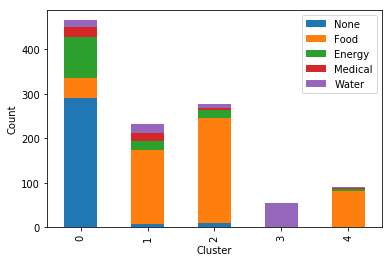

In [52]:
ax = cluster_df.plot.bar(stacked=True)
plt.legend()
plt.xlabel("Cluster")
plt.ylabel("Count")

Next, let's visualize our clusters using PCA.

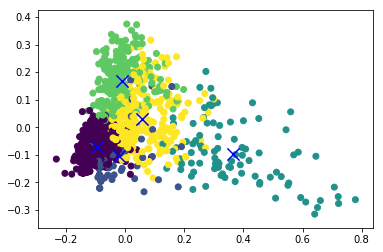

In [21]:
# reduce the features to 2D
pca = PCA(n_components=2)

reduced_features = pca.fit_transform(vec_train_tweets.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(km_model.cluster_centers_)

# plot the clusters
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km_model.predict(vec_train_tweets))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.show()

How does this compare to the previous plot with the previous labels? 

Let's take a look at the text inside each cluster. We'll use the get_cluster_sample function to print out text from a given cluster. Change the cluster number and observe what text output you get. What patterns do you notice? 

In [22]:
def get_cluster_sample(orig_text, model, tweet_index, preview=15):
    """
    Display original text for tweets in cluster with tweet_index
    """
    for i,idx in enumerate(np.where(model.labels_ == tweet_index)[0]):
        print(orig_text[idx].replace('\n',' '))
        print()
        if i > preview:
            print('( >>> truncated preview <<< )')
            break

In [23]:
num_cluster = 2
get_cluster_sample(tweets_text, km_model, num_cluster)

Women 's clothing , young boy 's clothing . Non perishable foods . Toys and books .

paper products , pet food , canned food , hygiene products , diapers

Sent another email to ****************** for help . ****************** offered to donate clothing , non-perishable food , cleaning supplies , baby supplies , baby clothing , toys and other goods

clothing , baby supplies , painkillers

I have baby items , non-perishable food , and hygiene products . Where can I bring them ? !

Non-perishable food . All I can carry/afford

Clothing , non-perishables , pet food , hygiene products

We can supply clothing , baby supplies , non perishables , hygiene products and perhaps tools

I work for a mid size law firm that has offices in PA , NJ and NY . The proprietor has given me permission to take up collection of clothing , non-perishable foods , hygiene products , baby items , toys , and home goods . I need someone to contact me to work out logistics and paperwork . Thanks . *************

I ca

References: 
https://twitterdev.github.io/do_more_with_twitter_data/clustering-users.html


### Challenge problem: Implement kmeans on the blob dataset (from problem 1) 


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice.
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


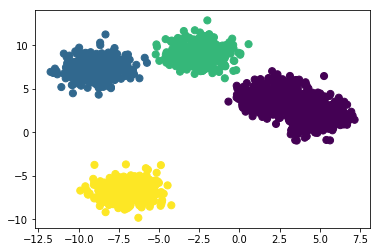

In [55]:
from sklearn.metrics import pairwise_distances_argmin

X, y = make_blobs(n_samples=2000, centers=5, random_state=random_state)

'''
Function to calculate the Euclidean distance between two points 
'''
def get_distance_btw_pts(pt1, pt2): 
    distance = np.linalg.norm(pt1-pt2)
    return distance 

'''
Return the index of the cluser (if you have five clusters this will be a 
number between 0 and 4) to whom the data point is closest 
Inputs 
- X: data 
- pt_index: index of the point you want the closest center to 
- centers: list of the coordinates of the centers 
'''
def get_closest_center(X, pt_coord, centers): 
  ### YOUR CODE HERE ####
    min_distance = np.inf
    closest_center_index = None
    for i,center in enumerate(centers): 
        distance = get_distance_btw_pts(X[pt_coord], center)
        if (distance < min_distance): 
            min_distance = distance 
            closest_center_index = i
  ### YOUR CODE HERE ####
    return closest_center_index

'''
Return the centroid of a cluster
Inputs 
- X: data 
- labels: list of cluster indices that correspond to the data 
- cluster_num: index of the cluster we want the center of 
'''
def get_cluster_center(X, labels, cluster_num): 
  ### YOUR CODE HERE ####
    list_pts_in_cluster = []
    for i,label in enumerate(labels): 
        if label == cluster_num: 
            list_pts_in_cluster.append(X[i])
        cluster_center = np.array(list_pts_in_cluster).mean(0)
  ### END CODE HERE ####
    return cluster_center

def find_clusters(X, n_clusters, rseed=2):
    # Step 1: Randomly choose clusters
    rng = np.random.RandomState(rseed)
    centers_coords = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[centers_coords]
    
    while True:  
        # Step 2: Assign labels based on closest center
        labels = []
        for j in range(X.shape[0]): 
            label = get_closest_center(X, j, centers)
            labels.append(label)
        labels = np.array(labels)

        # Step 3: Find new centers from means of points
        new_centers = []
        for i in range(n_clusters): 
            new_centers.append(get_cluster_center(X, labels, i))
        new_centers = np.array(new_centers)

        # Step 4: Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');


Can you come up with more pythonic syntax for steps 2 and 3?